<a href="https://colab.research.google.com/github/gaboojie/ds3001-linearRegression/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

By Gabriel Jackson (tbp8gx)

I did Q1 and Q3 (out of interest, because I think US courts are very prejudiced.)

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.

  *Code is provided below with the average prices and scores by `Neighbourhood` in the table below (under the 'mean' column). The kernel density plots are provided after this table. The most expensive bourough on average is 'Manhattan' with a mean price of ~ $183.66.*

                  Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0  


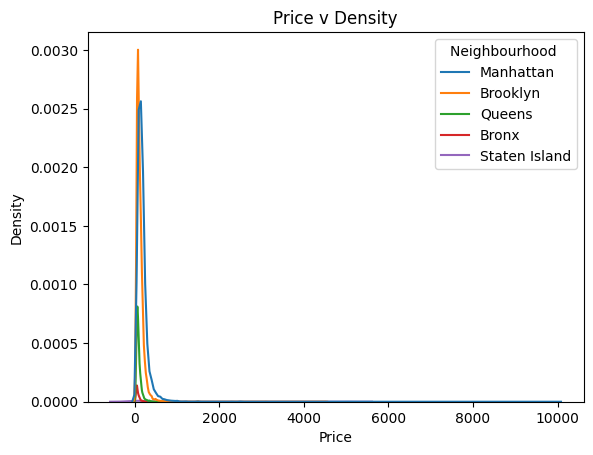

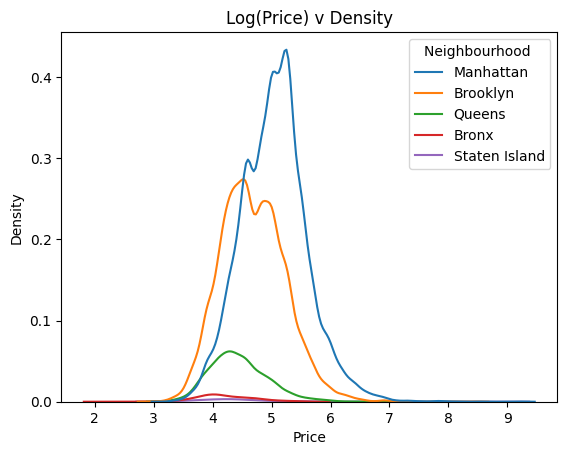

In [61]:
# Import required libraries (needed for run-time)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load and display the .csv file as a dataframe, df
df = pd.read_csv('./data/Q1_clean.csv')

# Get most expensive bourough by grouping by neighbourhood and describing in a table
price_and_neighbourhood = df.loc[:, ['Price', 'Neighbourhood ']]
neighbourhood_grouping = price_and_neighbourhood.groupby('Neighbourhood ')
print(neighbourhood_grouping.describe())

price = df['Price']
neighbourhood = df['Neighbourhood ']

# Create a kernel density plot of price, grouping by Neighbourhood
sns.kdeplot(x=price, hue=neighbourhood)
plt.title("Price v Density")
plt.show()

# Create a kernel density plot of log price, grouping by Neighbourhood
log_price = np.log(df['Price'])
sns.kdeplot(x=log_price, hue=neighbourhood)
plt.title("Log(Price) v Density")
plt.show()


2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

  *Code is provided below. I see a pattern where the coefficients in the regression table are the same as the average price for a given neighborhood (which can be seen in the table in part 1). Therefore, for the dummy variable, the regression coefficients represent the mean in a regression (without an intercept) of a continuous variable on one categorical variable.*


In [62]:
# Import linear model from sklearn
from sklearn import linear_model

# Get price and dummy variable
price = df['Price']
dummy_neighbourhood = pd.get_dummies(df['Neighbourhood '], dtype='int')

# Perform linear regression
regression = linear_model.LinearRegression(fit_intercept=False).fit(dummy_neighbourhood, price)

# Convert regression into dataframe and print
cols_vals_dict = { 'Neighbourhood ': regression.feature_names_in_, 'Regression Coefficient': regression.coef_}
regression_df = pd.DataFrame(cols_vals_dict)
print(regression_df)


  Neighbourhood   Regression Coefficient
0          Bronx               75.276498
1       Brooklyn              127.747378
2      Manhattan              183.664286
3         Queens               96.857233
4  Staten Island              146.166667


3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

  *Code is provided below. I handle the creation of the dummy differently by dropping the first (in this case the Bronx), which is used as the value of the intercept (~75.276). (I also included the intercept this time when performing the regression.) To get the coefficients in part 2 from these new coefficients, simply add the value of the intercept (the Bronx's coefficient in part 2) to each regression coefficient in this step. The regression coefficients in this step are effectively less than the previous step by an amount of this step's regression intercept.*


In [64]:
# Import linear model from sklearn
from sklearn import linear_model

# Get price and dummy variable (and drop first)
price = df['Price']
dummy_neighbourhood = pd.get_dummies(df['Neighbourhood '], drop_first=True, dtype='int')

# Perform linear regression (but with an intercept this time)
regression = linear_model.LinearRegression().fit(dummy_neighbourhood, price)

# Convert regression into dataframe and print
cols_vals_dict = { 'Neighbourhood ': regression.feature_names_in_, 'Regression Coefficient': regression.coef_}
regression_df = pd.DataFrame(cols_vals_dict)
print(regression_df)

# Print the regression's intercept
print("\nRegression's intercept: ", str(regression.intercept_))


  Neighbourhood   Regression Coefficient
0       Brooklyn               52.470881
1      Manhattan              108.387789
2         Queens               21.580735
3  Staten Island               70.890169

Regression's intercept:  75.27649769585331


4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

  *Code is provided below. The $R^2$ on the test set is ~ '0.06701086106947296' and the RMSE on the test set is ~ '125.01092061382933'. The coefficient on `Review Scores Rating` is ~ '1.032257'. The most expensive property price costs roughly $193 per night for a property in Manhattan that has a rating of 100.*


In [65]:
# Import linear model and train_test_split from sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Get price and rating_and_neighborhood's variables
price = df['Price']
rating_and_neighbourhood = df.loc[:, ['Review Scores Rating', 'Neighbourhood ']]

# Train based on rating_and_neighborhoud and price
rn_train, rn_test, price_train, price_test = train_test_split(rating_and_neighbourhood, price, random_state=100, test_size=0.2)

# Concat trained review scores rating and dummies from trained neighbourhood
review_rn_train = pd.concat([rn_train['Review Scores Rating'], pd.get_dummies(rn_train['Neighbourhood '], dtype='int')], axis = 1)

# Concat tested review scores rating and dummies from tested neighbourhood
review_rn_test = pd.concat([rn_test['Review Scores Rating'], pd.get_dummies(rn_test['Neighbourhood '], dtype='int')], axis = 1)

# Calculate regression
regression = linear_model.LinearRegression(fit_intercept=False).fit(review_rn_train, price_train)

# Print RSQ
print('RSQ:', regression.score(review_rn_test, price_test))

# Print RMSE
y_hat = regression.predict(review_rn_test)
print('RMSE:', np.sqrt(np.mean( (price_test - y_hat) * (price_test - y_hat) )))
print()

# Convert regression into dataframe and print
cols_vals_dict = { 'Feature names': regression.feature_names_in_, 'Regression Coefficient': regression.coef_}
regression_df = pd.DataFrame(cols_vals_dict)
print(regression_df)

# Calculate most expensive property (using a rating of 100 and the coefficients for Manhattan and Review Scores Rating found in the above regression_df)
rating = 100
coefficient_for_manhattan = 89.421020
coefficient_for_review_scores_rating = 1.032257
most_expensive_property_price = rating * coefficient_for_review_scores_rating + coefficient_for_manhattan
print("\nMost expensive property price:", str(most_expensive_property_price))


RSQ: 0.06701086106947296
RMSE: 125.01092061382933

          Feature names  Regression Coefficient
0  Review Scores Rating                1.032257
1                 Bronx              -17.261392
2              Brooklyn               32.180888
3             Manhattan               89.421020
4                Queens                4.050208
5         Staten Island               61.576393

Most expensive property price: 192.64672000000002


5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

  *Code is provided below. The $R^2$ is ~ '0.22035348129282306' and the RMSE is ~ '114.27692123130633' for the test set. The coefficient of 'Review Scores Rating' is '0.626912'. The most expensive kind of property that can be rented is an Entire Home/Apartment in Manhattan with a cost of roughly $227. Note this differs from the solutions.ipynb, because to my knowledge it was calculated wrong (the review scores rating is off by a decimal place in the provided solutions).*

In [ ]:
# Import linear model and train_test_split from sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Get price and rating_neighbourhood_and_room_type's variables
price = df['Price']
rating_neighbourhood_and_room_type = df.loc[:, ['Review Scores Rating', 'Neighbourhood ', 'Room Type']]

# Train based on rating_neighbourhood_and_room_type and price
rnr_train, rnr_test, price_train, price_test = train_test_split(rating_neighbourhood_and_room_type, price, random_state=100, test_size=0.2)

# Concat trained review scores rating and dummies from trained neighbourhood and room type
train_list = [rnr_train['Review Scores Rating'], pd.get_dummies(rnr_train['Neighbourhood '], dtype='int'), pd.get_dummies(rnr_train['Room Type'], dtype='int')]
rnr_train = pd.concat(train_list, axis = 1)

# Concat tested review scores rating and dummies from tested neighbourhood and room type
test_list = [rnr_test['Review Scores Rating'], pd.get_dummies(rnr_test['Neighbourhood '], dtype='int'), pd.get_dummies(rnr_test['Room Type'], dtype='int')]
rnr_test = pd.concat(test_list, axis = 1)

# Calculate regression
regression = linear_model.LinearRegression(fit_intercept=False).fit(rnr_train, price_train)

# Print RSQ
print('RSQ:', regression.score(rnr_test, price_test))

# Print RMSE
y_hat = regression.predict(rnr_test)
print('RMSE:', np.sqrt(np.mean( (price_test - y_hat) * (price_test - y_hat) )))
print()

# Convert regression into dataframe and print
cols_vals_dict = { 'Feature names': regression.feature_names_in_, 'Regression Coefficient': regression.coef_}
regression_df = pd.DataFrame(cols_vals_dict)
print(regression_df)

# Calculate most expensive property (using a rating of 100, the entire home/apt coefficient, the manhattan coefficient, and the review scores rating coefficient found in the above regression_df)
rating = 100
coefficient_for_entire = 110.617820
coefficient_for_manhattan = 53.693304
coefficient_for_review_scores_rating = 0.626912
most_expensive_property_price = rating * coefficient_for_review_scores_rating + coefficient_for_manhattan + coefficient_for_entire
print("\nMost expensive property price:", str(most_expensive_property_price))


RSQ: 0.22035348129282306
RMSE: 114.27692123130633

          Feature names  Regression Coefficient
0  Review Scores Rating                0.626912
1                 Bronx              -13.022765
2              Brooklyn               10.378456
3             Manhattan               53.693304
4                Queens               -6.833330
5         Staten Island               50.003022
6       Entire home/apt              110.617820
7          Private room                3.101341
8           Shared room              -19.500474

Most expensive property price: 227.002324


6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multiple linear regression works.

  *In part 5, 'Review Scores Rating' has less of an influence in predicting the price as there are multiple linear regressions working. Because there are more variables that are used to predict the price, 'Review Scores Rating' has less of an impact in part 5 than part 4. This can be seen by how much the 'Review Scores Rating' coefficient in part 5 is less than the coefficient in part 4 (0.626912 < 1.032257). This means that the price fluctuates not only by 'Review Scores Rating', but also by room type.*


7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

  *As this question is optional (not a part of the grade), I will not complete it due to how busy this and next week are/will be for me.*

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.

  *Code is provided below.*

In [66]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load pretrial_data.csv
df = pd.read_csv('./data/pretrial_data.csv')

# Clean 'sex' variable -> Replace M and F with Male and Female, respectively
df['sex'] = df['sex'].replace(['M', 'F'], ['Male', 'Female'])

# Clean 'held' variable -> Cast to int
df['held'] = df['held_wo_bail'].astype(int)

# Create 'isBlack' variable -> by masking race category to boolean represented as an int
df['is_black'] = (df['race'] == 'B').astype(int)

# Combine variables into new dataframe
cleaned_df = df.loc[:, ['held', 'is_black', 'sex', 'case_type', 'is_poor', 'prior_F']]
cleaned_df = cleaned_df.dropna()

# Print cleaned df
print(cleaned_df)

       held  is_black     sex case_type  is_poor  prior_F
3         0         1    Male         M      0.0      0.0
4         0         0  Female         F      0.0      0.0
5         0         1    Male         M      0.0      1.0
6         0         1  Female         F      1.0      0.0
7         0         1    Male         M      0.0      0.0
...     ...       ...     ...       ...      ...      ...
22980     0         0    Male         M      0.0      1.0
22981     0         1    Male         M      1.0     12.0
22983     0         1    Male         M      1.0      6.0
22984     0         1  Female         M      0.0      1.0
22985     0         1    Male         M      1.0      2.0

[21554 rows x 6 columns]


2. Create a dummy variable indicating that the defendant is Black.

  *Code is provided below.*

In [52]:
# This is the same code as the last part that is used to determine if the defendant is Black
# If race is B (black), then set to 1 (true)
# If race is not B, then set to 0 (false)

df['is_black'] = (df['race'] == 'B').astype(int)

3. Regress `held` on `Black`. What is the slope coefficient? Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?

  *Code is provided below. The slope coefficient is '0.068686' and the RSQ is '0.0058421416523439795'. This means that a Black person is roughly 6.8% more likely to be held without bail (based on the slope coefficient).*


In [53]:
# Import linear model from sklearn
from sklearn.linear_model import LinearRegression

# My idea is somewhat similar to problem 1 part 3 where is_black for type 0 (false) is omitted and used as the intercept
# then the slope is what the coefficient is for when is_black for type 1 (true)

# Get held and is_black dummies
held = cleaned_df['held']
d_is_black = pd.get_dummies(cleaned_df['is_black'], dtype='int', drop_first=True)

# Perform linear regression
regression = LinearRegression().fit(d_is_black, held)

# Convert regression into dataframe and print
cols_vals_dict = { 'Is Black': d_is_black.columns, 'Regression Coefficient': regression.coef_}
regression_df = pd.DataFrame(cols_vals_dict)
print(regression_df)

# Calculate RSQ
print('\nRSQ:', regression.score(d_is_black, held))

   Is Black  Regression Coefficient
0         1                0.068586

RSQ: 0.0058421416523439795


4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.

  *Code provided below. The coefficient on the Black dummy variable decreases with every new variable introduced (in the order shown). I would imagine this happens due to the fact that there are more variables present, and that certain variables have more of an influence on whether or not bail was set, like if the person was considered poor or identified as a male (based on the last table's regression coefficients). This increase in the dimensionality of the independent variables would (and has) thus decreased the impact that the `is_black` variable would have on determining if bail was set or not.*

In [74]:
# Import linear model from sklearn
from sklearn.linear_model import LinearRegression

### HELD ON BLACK AND SEX ###

# Get dummy variable
d_sex = pd.get_dummies(cleaned_df['sex'], dtype='int', drop_first=True)

# Get held variable and sex and is_black dummy variables
held = cleaned_df['held']
is_black_and_sex_combined = pd.concat([cleaned_df['is_black'], d_sex], axis=1)

# Perform linear regression
regression = LinearRegression().fit(is_black_and_sex_combined, held)

# Convert regression into dataframe and print
cols_vals_dict = { 'Variables': is_black_and_sex_combined.columns, 'Coefficient': regression.coef_}
regression_df = pd.DataFrame(cols_vals_dict)
print("Table for held on Black and sex:\n")
print(regression_df)

Table for held on Black and sex:

  Variables  Coefficient
0  is_black     0.063244
1      Male     0.101377


In [75]:
# Import linear model from sklearn
from sklearn.linear_model import LinearRegression

### HELD ON BLACK AND SEX AND IS_POOR ###

# Get dummy variable
d_sex = pd.get_dummies(cleaned_df['sex'], dtype='int', drop_first=True)

# Get held variable and sex and is_black dummy variables
held = cleaned_df['held']
variables = pd.concat([cleaned_df.loc[:, ['is_black', 'is_poor']], d_sex], axis=1)

# Perform linear regression
regression = LinearRegression().fit(variables, held)

# Convert regression into dataframe and print
cols_vals_dict = { 'Variables': variables.columns, 'Coefficient': regression.coef_}
regression_df = pd.DataFrame(cols_vals_dict)
print("Table for held on Black, sex, and is_poor:\n")
print(regression_df)

Table for held on Black, sex, and is_poor:

  Variables  Coefficient
0  is_black     0.036386
1   is_poor     0.185337
2      Male     0.114845


In [76]:
# Import linear model from sklearn
from sklearn.linear_model import LinearRegression

### HELD ON BLACK AND SEX AND IS_POOR AND PRIOR_F ###

# Get held variable and dummy variables
held = cleaned_df['held']
variables = pd.concat([cleaned_df.loc[:, ['is_black', 'is_poor', 'prior_F']], d_sex], axis=1)

# Perform linear regression
regression = LinearRegression().fit(variables, held)

# Convert regression into dataframe and print
cols_vals_dict = { 'Variables': variables.columns, 'Coefficient': regression.coef_}
regression_df = pd.DataFrame(cols_vals_dict)
print("Table for held on is_black, sex, is_poor, and prior_F:\n")
print(regression_df)

Table for held on is_black, sex, is_poor, and prior_F:

  Variables  Coefficient
0  is_black     0.026643
1   is_poor     0.167606
2   prior_F     0.026004
3      Male     0.097799


In [77]:
# Import linear model from sklearn
from sklearn.linear_model import LinearRegression

### HELD ON BLACK AND SEX AND IS_POOR AND PRIOR_F AND CASE_TYPE ###

# Get held variable and dummy variables
held = cleaned_df['held']
case_type_dummies = pd.get_dummies(cleaned_df['case_type'], dtype='int', drop_first=True)
variables = pd.concat([cleaned_df.loc[:, ['is_black', 'is_poor', 'prior_F']], d_sex, case_type_dummies], axis=1)

# Perform linear regression
regression = LinearRegression().fit(variables, held)

# Convert regression into dataframe and print
cols_vals_dict = { 'Variables': variables.columns, 'Coefficient': regression.coef_}
regression_df = pd.DataFrame(cols_vals_dict)
print("Table for held on is_black, sex, is_poor, prior_F, and case_type:\n")
print(regression_df)

Table for held on is_black, sex, is_poor, prior_F, and case_type:

  Variables  Coefficient
0  is_black     0.019542
1   is_poor     0.073680
2   prior_F     0.016164
3      Male     0.084493
4         I    -0.508384
5         M    -0.421186
6         S    -0.139857


5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.

  *Code is provided below. To determine this, I used the coefficients within the table below as a probability indicator of being held without bail. First, the Black women coefficient showed that Black women have the lowest probability to be held without bail (0.174618). The next highest was non-Black women, who have a probability of 0.196509. The next highest was non-Black men with a probability of 0.253858 and the highest probability was Black men with a probability of 0.347722. Therefore, given these probabilities, it is pretty clear that Black men and women are treated systematically different from the rest of the population (simply by the vast differences within these coefficients/probabilities).*


In [78]:
# To determine how sex and if the individual was Black or not would impact systematic treatment in setting bail,
# a new variable, called 'race_and_sex' was introduced that effectively combines the two as a new variable.
cleaned_df['race_and_sex'] = cleaned_df['is_black'].replace([0, 1], ['Not_Black', 'Black']) + '_' + cleaned_df['sex']

# Get held variable and dummy variables
held = cleaned_df['held']
d_race_and_sex = pd.get_dummies(cleaned_df['race_and_sex'], dtype='int')

# Perform linear regression
regression = LinearRegression(fit_intercept=False).fit(d_race_and_sex, held)

# Convert regression into dataframe and print
cols_vals_dict = { 'Race and Sex': d_race_and_sex.columns, 'Coefficient': regression.coef_}
regression_df = pd.DataFrame(cols_vals_dict)
print(regression_df)

       Race and Sex  Coefficient
0      Black_Female     0.174618
1        Black_Male     0.347722
2  Not_Black_Female     0.196509
3    Not_Black_Male     0.253858


6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

  *There definitely are benefits to using these kinds of models to help a judge/magistrate make bail decisions. For instance, this could help the judge/magistrate make more reliable decisions by relying on models (and helping reduce bias in court). It could also be used to deter decisions that statistically hurt groups within society, such as the discrimination against Black men (in the table above). This, therefore, could provide a better foundation for equality (and equity) in court. However, while I do think there are benefits, there can also be detriments. One detriment is that it uses old data for a future world. This old data is clearly biased, which could very well be used to make more biased decisions if included in the bail decision process. I'm also worried that the model could make mistakes as no model can perfectly fit the real world, which could have significant consequences for those charged. In my eyes, the best system would be to use a model like this (with continuously newer data) and try to create more equitable solutions in society. However, I don't think automated tools like these should be allowed to make the final decision. In other words, I think it is a tool that should aid decision-making, but not make the decision.*

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?